![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

### <center>  Grupo 22 </center>

<center>David Alejandro Rojas Castro - da.rojasc123@uniandes.edu.co </center>
<center>Camila Malagón Suarez - c.malagons@uniandes.edu.co</center>
<center>Luis David Gutierrez - ld.gutierrezl1@uniandes.edu.co</center>
<center>David Zapata Vásquez - d.zapata11@uniandes.edu.co</center>

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [8]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [10]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [12]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

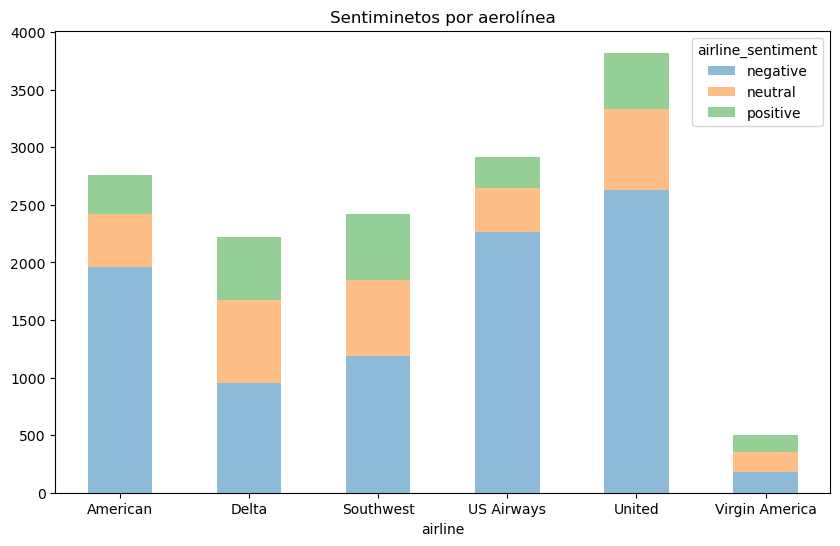

In [14]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [18]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [20]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [22]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [24]:
vectorizer = CountVectorizer()

# Aplicar fit_transform al conjunto de entrenamiento para aprender el vocabulario y transformarlo en vectores de frecuencia.
X_train_vec = vectorizer.fit_transform(X_train)

# Aplicar transform al conjunto de test usando el mismo vocabulario.
X_test_vec = vectorizer.transform(X_test)

In [28]:
# Crear el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train_vec, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# Predecir los sentimientos en el conjunto de prueba
y_pred_punto1 = rf_model.predict(X_test_vec)

# Calcular la exactitud del modelo
accuracy_punto1 = accuracy_score(y_test, y_pred_punto1)
print(f"Accuracy punto 1: {accuracy_punto1:.2f}")

Accuracy punto 1: 0.77


### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [34]:
# Crear el CountVectorizer con eliminación de stopwords
vectorizer_sw = CountVectorizer(stop_words='english')

# Aplicar fit_transform al conjunto de entrenamiento para aprender el vocabulario y transformarlo en vectores de frecuencia.
X_train_sw = vectorizer_sw.fit_transform(X_train)

# Aplicar transform al conjunto de test usando el mismo vocabulario.
X_test_sw = vectorizer_sw.transform(X_test)

In [36]:
# Crear el modelo Random Forest
sw_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
sw_model.fit(X_train_sw, y_train)

RandomForestClassifier(random_state=42)

In [40]:
# Predecir los sentimientos en el conjunto de prueba
y_pred_sw = sw_model.predict(X_test_sw)

# Calcular la exactitud del modelo
accuracy_sw = accuracy_score(y_test, y_pred_sw)
print(f"Accuracy Punto 2: {accuracy_sw:.2f}")

Accuracy Punto 2: 0.76


### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [42]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Asegurarse de tener descargados los recursos necesarios de NLTK
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_texts(text):
    words = nltk.word_tokenize(text)
    return [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in words]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [44]:
from sklearn.feature_extraction.text import CountVectorizer

# Crear CountVectorizer usando la función personalizada de tokenización y lematización
vectorizer_lem = CountVectorizer(tokenizer=lemmatize_texts)

# Aplicar fit_transform al conjunto de entrenamiento para aprender el vocabulario y transformarlo en vectores de frecuencia.
X_train_lem = vectorizer_lem.fit_transform(X_train)

# Aplicar transform al conjunto de test usando el mismo vocabulario.
X_test_lem = vectorizer_lem.transform(X_test)

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Crear el modelo Random Forest
lem_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
lem_model.fit(X_train_lem, y_train)

RandomForestClassifier(random_state=42)

In [48]:
# Predecir los sentimientos en el conjunto de prueba
y_pred_lem = lem_model.predict(X_test_lem)

# Calcular la exactitud del modelo
accuracy_lem = accuracy_score(y_test, y_pred_lem)
print(f"Accuracy Punto 3: {accuracy_lem:.2f}")

Accuracy Punto 3: 0.77


### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

# Crear CountVectorizer usando la función personalizada de tokenización y lematización
vectorizer_splem = CountVectorizer(tokenizer=lemmatize_texts, stop_words='english')

# Aplicar fit_transform al conjunto de entrenamiento para aprender el vocabulario y transformarlo en vectores de frecuencia.
X_train_splem = vectorizer_splem.fit_transform(X_train)

# Aplicar transform al conjunto de test usando el mismo vocabulario.
X_test_splem = vectorizer_splem.transform(X_test)

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Crear el modelo Random Forest
splem_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
splem_model.fit(X_train_splem, y_train)

RandomForestClassifier(random_state=42)

In [54]:
# Realizar predicciones en el conjunto de prueba
y_pred_splem = splem_model.predict(X_test_splem)

# Calcular y imprimir la exactitud
accuracy_splem = accuracy_score(y_test, y_pred_splem)
print(f"Accuracy Punto 4: {accuracy_splem:.2f}")

Accuracy Punto 4: 0.78


### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

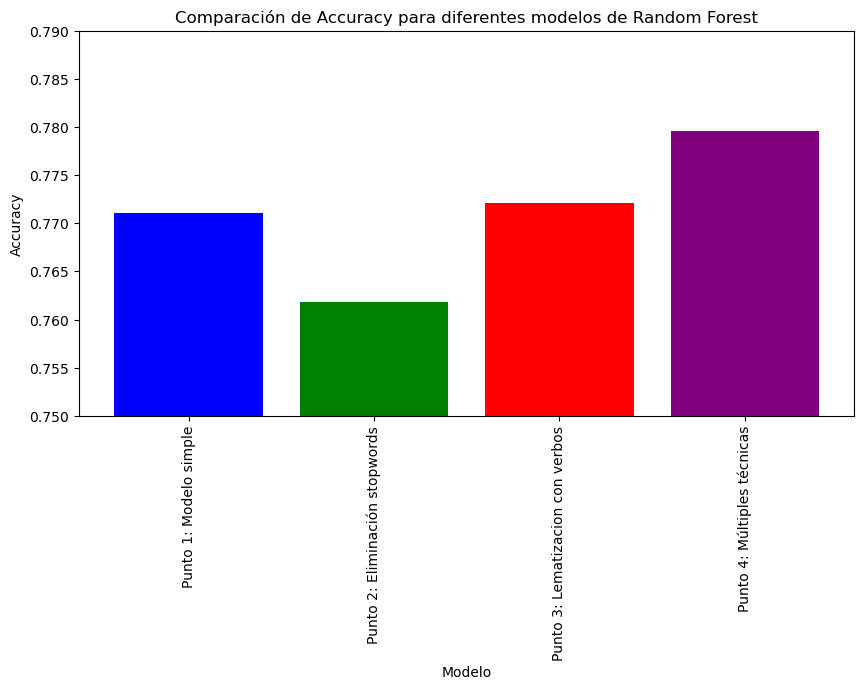

In [60]:
import matplotlib.pyplot as plt

# Resultados de accuracy para cada punto
accuracies = [accuracy_punto1, accuracy_sw, accuracy_lem, accuracy_splem]
labels = ['Punto 1: Modelo simple', 'Punto 2: Eliminación stopwords', 'Punto 3: Lematizacion con verbos', 'Punto 4: Múltiples técnicas']

# Creación de la gráfica
plt.figure(figsize=(10, 5))
plt.bar(labels, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Modelo')
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracy para diferentes modelos de Random Forest')
plt.ylim(0.75, 0.79)
plt.xticks(rotation=90)
plt.show()

**Análisis y Conclusión**
1. Punto 1 (**Modelo básico**) y Punto 3 (**Solo lematización**) tienen el mismo rendimiento con un accuracy de **0.77**. Lo que quiere decir que el modelo sólo con lematización no tuvo impacto significativo en mejorar la precisión del modelo.
2. Punto 2 (**Eliminación de stopwords**) tiene una precisión ligeramente inferior (**0.76**). Esto podría indicar que eliminar stopwords sin otras técnicas de preprocesamiento podría estar quitando contexto útil que ayuda al modelo a entender mejor el sentimiento.
3. Punto 4 (**Lematización con eliminación de stopwords**) muestra la mejor precisión con **0.78**. Esto indica que la combinación de lematización y eliminación de stopwords puede ser la más efectiva para este conjunto de datos, posiblemente porque reduce el ruido y mejora la relevancia de las características que el modelo evalúa.